# Housing Price Project

**The objective is to draw some insights from the housing prices derived from the U.S. Census Service dataset.**

-----

**Importing, cleaning and looking at data:**

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df_boston = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')
df_boston

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [3]:
#Dropping the first column, after the index, as it seemed it was unnecessary for our analysis#

df_boston.drop(columns = 'Unnamed: 0', inplace = True)

In [4]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [5]:
#Some general information from the dataset#

df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


---------

**Task 5 Question 1 : Is there a significant difference in median value of houses bounded by the Charles river or not?**

In [6]:
#To analyse the task mentioned above I will first look at the median value for all the houses in the data#

print('Median value of all houses in the data:',df_boston['MEDV'].median())

Median value of all houses in the data: 21.2


In [7]:
print('Median value of all houses in the data:',df_boston['MEDV'].median(),
      '\nMean value of all houses in the data:', df_boston['MEDV'].mean())

Median value of all houses in the data: 21.2 
Mean value of all houses in the data: 22.532806324110698


From the output above we can see that there is not much difference between median and mean values

In [8]:
#Now we look at the median value of the houses but taking in consideration those bounded by Charles River#

median_value_RiverVSNotRiver = df_boston.groupby('CHAS')[['MEDV']].median()
median_value_RiverVSNotRiver

,MEDV
CHAS,
0.0,20.9
1.0,23.3


1. As we can see by the grouped statistics above if the house is bounded by the river(CHAS = 1), then the median value is higher at 23.3
2. Whereas when the houses are not bounded by the river (CHAS = 0), the median value is lower at 20.9

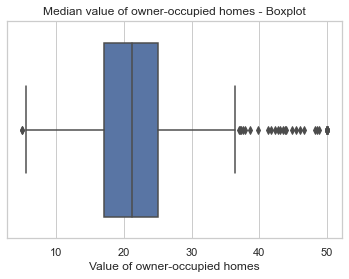

In [9]:
#Now let's look at the boxplot of median value of all houses in the data#

sns.set(style = 'whitegrid')
boxplot1 = sns.boxplot(x = 'MEDV', data = df_boston)
boxplot1.set_xlabel('Value of owner-occupied homes')
boxplot1.set_title('Median value of owner-occupied homes - Boxplot')
plt.show()

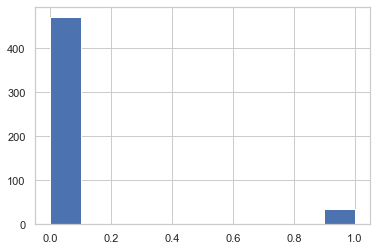

In [10]:
#Now creating a histogram for the Charles river variable#

sns.set(style = 'whitegrid')
histogram1 = plt.hist(df_boston['CHAS'])

1. This shows that there are over 450 properties that are NOT bounded by the river Charles
2. The properties bounded by the river are below 50
3. We have only two bars, one at 0 which means these houses are not bounded by the river and one at 1 which means these houses are bounded by the river

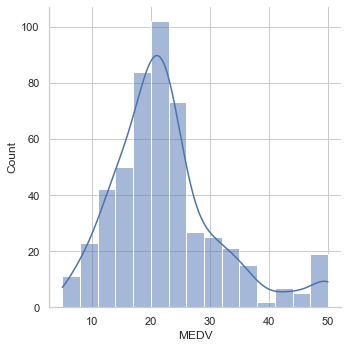

In [11]:
##Now we are going to use T-test for indipendent samples to determine if there is a relationship in median value of houses bounded by the Charles river or not##

import scipy
from scipy.stats import norm

plot1 = sns.displot(df_boston['MEDV'], bins = 15, kde = True)

1. The data for the median value of houses seem to have approximately a bell-spaed curve with a suddend small spike at the end
2. We are going to assume normality

In [12]:
#Before performing the T-test we need to decide if going to assume if the two groups* have equal or unequal variances#
#groups*: By groups I mean: Median value of houses bounded by river Charles VS Median value of houses not bounded by river Charles#

#The Null Hypothesis is that there is not difference among the variances, they have equal variances#
#Alternative Hypothesis is that there is a significant difference# 

scipy.stats.levene(df_boston[df_boston['CHAS'] == 1]['MEDV'],
                  df_boston[df_boston['CHAS'] == 0]['MEDV'],
                  center = 'mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

1. The p-value < 0.05 this means there is strong evidence against the Null Hypothesis, so we reject the Null
2. So we assume the two groups have unequal variances

In [13]:
#The test above is 'reduntant' or unnecessary because we can just direclty check their variances and see if they are very similar or not#

print('The variance of the median value of houses by the river:', df_boston[df_boston['CHAS'] == 1]['MEDV'].var(),
'\nThe variance of the median value of houses not by the river:', df_boston[df_boston['CHAS'] == 0]['MEDV'].var())

The variance of the median value of houses by the river: 139.63305882352938 
The variance of the median value of houses not by the river: 77.99296200930563


1. As we can see the median values are quite far from each other

In [14]:
#Now we perform the T-test#
#Null Hypotheis: There is no significant difference between the median value of houses bounded by the Charles river#
#Alternative Hypothesis: There is a significant difference between the two#

scipy.stats.ttest_ind(df_boston[df_boston['CHAS'] == 1]['MEDV'],
                     df_boston[df_boston['CHAS'] == 0]['MEDV'],
                     equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

1. Here, p-value < 0.05.This means we have strong evidence against the null.So we reject the Null
2. We conclude that there is a signifincat difference in the median value of houses bounded by the Charles River against those which are not bounded by the river

----------

**Task 5 Question 2 :Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?**

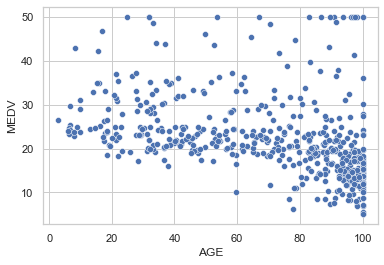

In [15]:
#Generating a scatterplot for the AGE and MEDV varibales#

ax = sns.scatterplot(x = ('AGE'),y = ('MEDV'), data = df_boston)

In [16]:
#sub-dividing data in 3 categories#

df_boston.loc[(df_boston['AGE'] <= 35, 'age_group')] = '35 years and younger'
df_boston.loc[(df_boston['AGE'] > 35)&(df_boston['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
df_boston.loc[(df_boston['AGE'] >= 75, 'age_group')] = '70 years and older'


thirtyfive_lower = df_boston[df_boston['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = df_boston[df_boston['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_above = df_boston[df_boston['age_group'] == '70 years and older']['MEDV']



**Going to use ANOVA to test if there is a signifincat difference in the median house value among thse 3 groups**

In [17]:
#Null Hypothesis: The mean value of these three groups are the same#
#Alternative Hypothesis: At least one of the median house value is different#

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower,thirtyfive_seventy,
                                            seventy_above)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 39.48680546865226, P-Value: 1.3377777392035556e-16


1. The p-value < 0.05 very strong evidence against the Null. So, we reject the Null Hypothesis
2. This implies, that there is a significant difference between at least of one of the group for the median house value

--------

**Task 5 Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?**

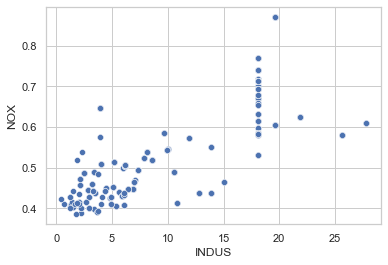

In [18]:
# First I am going to use a scatterplot check for a relationship#

ax = sns.scatterplot(x = 'INDUS', y = 'NOX', data = df_boston)
plt.show()

1. As we can see there seem to be a positive correlation between proportion of non-retail business acres per town and nitric oxides concentration
2. As one increases the other increases too. But it has some strange behaviour between 15 and 20 on the x-axis

In [19]:
#Applying the Pearson Correlation Test#

#Null Hypothesis: There is no correlation between non-retail business acres per town and nitric oxides concentration#
#Alternative Hypothesis: There is some correlation between the rwo variables#

pearson_tests = scipy.stats.pearsonr(df_boston['INDUS'], df_boston['NOX'])
print(pearson_tests)

(0.7636514469209162, 7.913361061229697e-98)


1. The p-value < 0.05 so there is strong evidence against the Null Hypothesis, so we reject the Null
2. This implies there is some significant correlation between the two variables

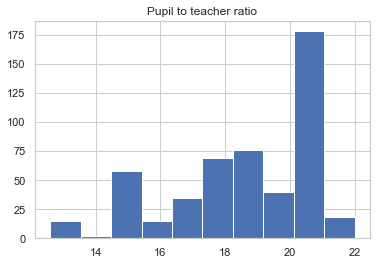

In [20]:
##Creating a hisotgram for the pupil to teacher ratio variable##

ax = plt.hist(df_boston['PTRATIO'])
plt.title('Pupil to teacher ratio')
plt.show()

-------

**Task 5 Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?**


In [21]:

#Null Hypothesis: There is no relationship beteen nedian value of owner-occupied homes and the weigted distance to five Boston centres##
#Alternative Hypothesis: There is some relationship between the  two variables#
import statsmodels.api as sm

X = df_boston['DIS']
y = df_boston['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
prediction = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           1.21e-08
Time:                        19:55:33   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. Since the p-value is < 0.05 for the "DIS" variable this shows strong evidence agaist the Null
2. This means, there is a significant relatoinship between the two variables
3. Also, since R-squared is 0.062 and coefficent is positive.then, the correlation coefficent is +0.249

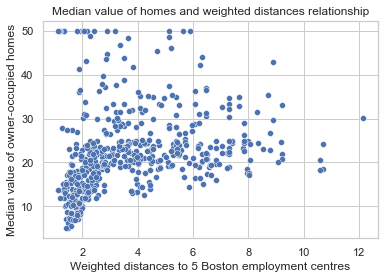

In [22]:
#trying to visualise the relationship using a scatterplot#

ax = sns.scatterplot(x = 'DIS', y = 'MEDV', data = df_boston)
ax.set(title = 'Median value of homes and weighted distances relationship')
ax.set(xlabel = 'Weighted distances to 5 Boston employment centres')
ax.set(ylabel = 'Median value of owner-occupied homes')
plt.show()

1. As we can see there seem to a be a positive correlation between the two variables